# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [227]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
import numpy as np
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [228]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [229]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [230]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

In [231]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_class))

0.668161434978


In [232]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

0.686098654709


In [233]:
# TASK 7 : Confusion Matrix
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[112  16]
 [ 54  41]]


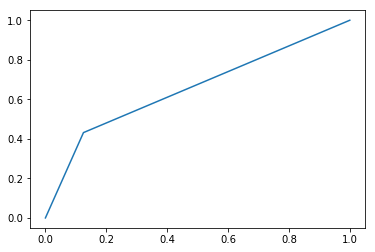

In [234]:
# TASK 8: Generate the ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

In [307]:
# TASK 9: What variables should we include in the model to improve it?
# There are no other functioning variables - all of the lower the accuracy.
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Fare.fillna(titanic.Fare.mean(), inplace=True)
titanic.SibSp.fillna(titanic.SibSp.mean(), inplace=True)
feature_cols = ['Pclass', 'Age','Parch', 'SibSp','Fare']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

0.67264573991


In [306]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_class = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred_class))

0.663677130045


In [310]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
y_pred_class = knn.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred_class))

0.654708520179


In [311]:
#Looks like Logistic Regression using 'Pclass' and 'Parch' and 'Age' is the most accurate 
# predictor of death on the Titanic!